In [1]:
%matplotlib inline
import pandas as pd

In [2]:
sra_info = pd.read_csv('categories/foo2.csv', usecols=["Sample Accession", "Organism Name"])
sra_info.head()

,Organism Name,Sample Accession
0,human gut metagenome,ERS4181500
1,human gut metagenome,ERS4181499
2,human gut metagenome,ERS4181498
3,human gut metagenome,ERS4181497
4,human gut metagenome,ERS4181496


In [3]:
run_info = pd.read_csv('all.runinfo.csv')
run_info.head()

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,DRR014176,2015-07-27 10:27:35,2015-07-27 10:32:25,30807540,3734314174,0,121,2297,NaN,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,NIID,DRA001171,NaN,public,4DA05CDDF555DF45B83261F309ADDDE7,CD8372E963A92B67C96160309CBDD52D
1,SRR8391109,2019-01-07 15:57:36,2019-01-07 15:51:59,1,1332,0,1332,0,NaN,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,CRASSPHAGE CONSORTIUM,SRA830045,NaN,public,0FCC68EB5CA35EE316539F4C0348E54F,39E03A9EF05D22741DCB6E80175743D0
2,DRR021939,2015-01-15 10:15:18,2015-01-15 10:18:19,18645,10781479,0,578,28,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,TOHOKUGL,DRA002421,NaN,public,B36925AE092F9ED96FA6EE6435522481,B904CCB0FE4FA1A287DDB5177B781F85
3,DRR025071,2016-03-09 18:20:13,2016-03-10 05:18:09,65366252,19609875600,65366252,300,10905,NaN,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,KYOTO_PREF,DRA002733,NaN,public,ED1A01B5C747C37B3641528802099C4C,C55C7EABB80C9A01ADA378250F62561A
4,DRR042304,2016-03-09 18:39:22,2016-03-10 00:38:05,13080182,1952719426,0,149,1208,NaN,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,NaN,NaN,NaN,NaN,UT_COB,DRA003827,NaN,public,DD4EDB2A6B72A0C649ABC2DA05BC38BF,1DFA20EA4FDA1A7B9C9AB3D67A9B6669


In [4]:
sra_remapping = pd.read_csv('categories/mapping.csv')
sra_remapping.head()

,Organism Name,sample_type
0,viral metagenome,viral metagenome
1,human viral metagenome,viral metagenome
2,marine metagenome,marine metagenome
3,human oral metagenome,human metagenome
4,Equus caballus,animal metagenome


In [5]:
remap_df = sra_info.set_index("Organism Name").join(sra_remapping.set_index("Organism Name"))
remap_df.head()
remap_df[~remap_df['sample_type'].isnull()]

,Sample Accession,sample_type
Organism Name,,
Equus caballus,ERS6626056,animal metagenome
Equus caballus,ERS6626055,animal metagenome
Equus caballus,ERS6626054,animal metagenome
Equus caballus,ERS6626053,animal metagenome
Equus caballus,ERS6626052,animal metagenome
...,...,...
viral metagenome,ERS4198115,viral metagenome
viral metagenome,ERS4198114,viral metagenome
viral metagenome,SRS6156495,viral metagenome


In [6]:
summary_df = pd.read_csv('all.summary.csv')

In [7]:
len(summary_df[summary_df['n_matches'] == 0])

2000

In [8]:
len(summary_df[summary_df['n_matches'] != 0])
nonempty_df = summary_df[summary_df['n_matches'] != 0]

In [9]:
len(summary_df[summary_df['p_weighted_covered'] > 90])

881

In [10]:
len(nonempty_df[nonempty_df['p_weighted_covered'] < 5])


1008

In [11]:
nonempty_df.describe()

,n_matches,p_weighted_covered
count,7988.000000,7988.000000
mean,273.413495,49.273748
std,455.414336,33.120600
min,1.000000,0.000000
25%,3.000000,16.100000
50%,64.000000,50.600000
75%,376.000000,81.600000
max,6215.000000,100.000000


In [12]:
summary_df.head()

,sample,n_matches,p_weighted_covered
0,DRR014176,373,88.1
1,DRR019507,97,4.3
2,DRR021939,1,68.0
3,DRR025071,1069,39.1
4,DRR033608,26,12.2


In [13]:
annot_d = dict()
annot_d['DRR014176'] = 'human metagenome'
annot_d['DRR019507'] = 'animal metagenome'
annot_d['DRR021939'] = 'plant metagenome'
annot_d['DRR025071'] = 'animal metagenome'
annot_d['DRR033608'] = 'human metagenome'
annot_d['DRR042304'] = 'human metagenome'
annot_d['DRR042358'] = 'human metagenome'
annot_d['DRR042386'] = 'human metagenome'
annot_d['DRR042446'] = 'human metagenome'
annot_d['DRR042485'] = 'human metagenome'
annot_d['DRR042584'] = 'human metagenome'
annot_d['DRR042629'] = 'human metagenome'
annot_d['DRR042631'] = 'human metagenome'
annot_d['DRR046082'] = 'human metagenome'
annot_d['DRR046093'] = 'human metagenome'
annot_d['DRR046403'] = 'fossil metagenome'
annot_d['DRR046412'] = 'fossil metagenome'
annot_d['DRR046817'] = 'sludge metagenome'
annot_d['DRR053211'] = 'marine metagenome'
annot_d['DRR066668'] = 'fermenter metagenome'

In [14]:
#get_from_dict = lambda x: annot_d.get(x, 'unknown')
#nonempty_df['sample_type'] = nonempty_df['sample'].apply(get_from_dict)

In [15]:
nonempty_df

,sample,n_matches,p_weighted_covered
0,DRR014176,373,88.1
1,DRR019507,97,4.3
2,DRR021939,1,68.0
3,DRR025071,1069,39.1
4,DRR033608,26,12.2
...,...,...,...
9981,SRR9965965,78,72.1
9982,SRR9966481,41,58.2
9983,SRR9966485,41,20.5
9984,SRR9969862,2041,53.5


In [16]:
x = set(nonempty_df['sample'])
y = set(run_info['Run'])
print(list(x)[:5])
print(list(y)[:5])
print(len(x & y))

['SRR8960122', 'ERR4616277', 'SRR8191136', 'ERR3946178', 'ERR1720542']
['SRR8960122', 'ERR1914063', 'ERR4616277', 'SRR8191136', 'ERR1075153']
6003


In [17]:
aa = run_info.set_index("Run")
aa.columns
aa['ScientificName']

Run
DRR014176          human metagenome
SRR8391109    uncultured crAssphage
DRR021939      uncultured bacterium
DRR025071        pig gut metagenome
DRR042304      human gut metagenome
                      ...          
SRR9966481               metagenome
SRR9966485               metagenome
SRR9969862           gut metagenome
SRR9973664        sponge metagenome
SRR9992996               metagenome
Name: ScientificName, Length: 11573, dtype: object

In [80]:
nonempty_df2 = nonempty_df.set_index('sample').join(run_info.set_index("Run")['ScientificName'])
nonempty_df2[~nonempty_df2.ScientificName.isnull()].head()

,n_matches,p_weighted_covered,ScientificName
DRR014176,373,88.1,human metagenome
DRR021939,1,68.0,uncultured bacterium
DRR025071,1069,39.1,pig gut metagenome
DRR042304,585,90.7,human gut metagenome
DRR042358,237,86.5,human gut metagenome


In [81]:
sra_remapping = pd.read_csv('categories/mapping.csv')
sra_remapping.head()

,Organism Name,sample_type
0,viral metagenome,viral metagenome
1,human viral metagenome,viral metagenome
2,marine metagenome,marine metagenome
3,human oral metagenome,human metagenome
4,Equus caballus,animal metagenome


In [ ]:
def do_remap(val):
    new_vals = list(sra_remapping[sra_remapping['Organism Name'] == val].sample_type)
    if new_vals:
        return new_vals[0]
    return val
    
nonempty_df2['sample_type'] = nonempty_df2['ScientificName'].apply(do_remap)

In [ ]:
nonempty_df2["sample_type"].value_counts()[:20]

In [79]:
#plot_names = ['human metagenome', 'marine metagenome']
plot_names = list(nonempty_df2["sample_type"].value_counts()[0:5].index)
print(plot_names)

['human metagenome', 'unknown', 'soil metagenome', 'animal metagenome', 'marine metagenome']


Text(0, 0.5, 'percent covered by known genomes')

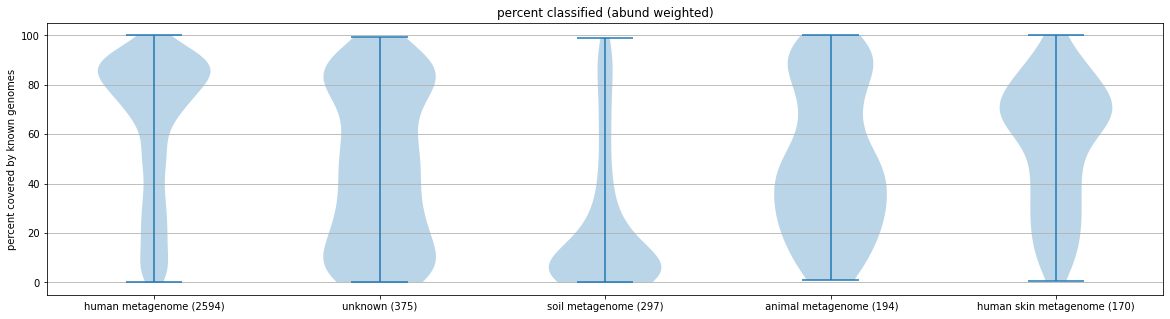

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=[20, 5])

datasets = []
for name in plot_names:
    datasets.append(nonempty_df2[nonempty_df2.sample_type == name]["p_weighted_covered"].values)

axes.violinplot(dataset = datasets)
#                           nonempty_df[df.Scenario == 'S2']["LMP"].values,

axes.set_title('percent classified (abund weighted)')
axes.yaxis.grid(True)
#axes.set_xlabel('Scenario')
#axes.set_ylabel('LMP ($/MWh)')

labels = [ f"{n} ({len(d)})" for (n, d) in zip(plot_names, datasets) ]

axes.set_xticks([y + 1 for y in range(len(plot_names))],
                labels=labels)
axes.set_ylabel('percent covered by known genomes')

#plt.show()

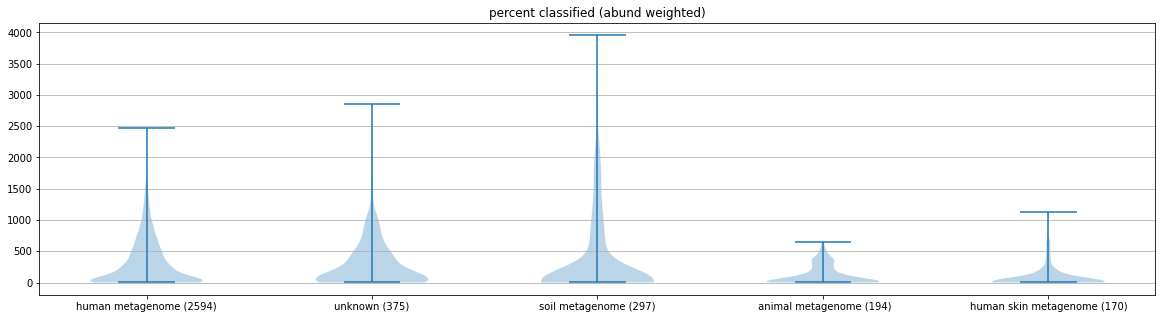

In [64]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=[20, 5])

datasets = []
for name in plot_names:
    datasets.append(nonempty_df2[nonempty_df2.sample_type == name]["n_matches"].values)

axes.violinplot(dataset = datasets)
#                           nonempty_df[df.Scenario == 'S2']["LMP"].values,

axes.set_title('percent classified (abund weighted)')
axes.yaxis.grid(True)
#axes.set_xlabel('Scenario')
#axes.set_ylabel('LMP ($/MWh)')

labels = [ f"{n} ({len(d)})" for (n, d) in zip(plot_names, datasets) ]

axes.set_xticks([y + 1 for y in range(len(plot_names))],
                labels=labels)
#axes.set_xlabel('Four separate samples')

#plt.show()